In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV , train_test_split

In [2]:
df = pd.read_excel(r"air_train.xlsx")


df1 = pd.read_excel(r"air_test.xlsx")


df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
df.dropna(inplace = True)
df1.dropna(inplace = True)

In [4]:
#train

df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"]).dt.day

df["Dep_Time_hr"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_Time_hr"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Time_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

#test

df1["Journey_month"] = pd.to_datetime(df1["Date_of_Journey"]).dt.month
df1["Journey_day"] = pd.to_datetime(df1["Date_of_Journey"]).dt.day

df1["Dep_Time_hr"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_Time_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute

df1["Arrival_Time_hr"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["Arrival_Time_min"] = pd.to_datetime(df1["Arrival_Time"]).dt.minute




In [5]:
df.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)
df1.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)


In [6]:
le = LabelEncoder()
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])

df1["Source"] = le.fit_transform(df1["Source"])
df1["Destination"] = le.fit_transform(df1["Destination"])



In [7]:
print(df.Airline.value_counts())
print(df1.Airline.value_counts())


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dt

In [8]:
#mapping

stop = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

df.loc[: , "Total_Stops"] = df["Total_Stops"].map(stop)

df1.loc[: , "Total_Stops"] = df1["Total_Stops"].map(stop)

In [9]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,2,1,19h,2,13882,9,6,9,25,4,25
3,IndiGo,3,0,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,0,5,4h 45m,1,13302,1,3,16,50,21,35
5,SpiceJet,3,0,2h 25m,0,3873,6,24,9,0,11,25
6,Jet Airways,0,5,15h 30m,1,11087,12,3,18,55,10,25
7,Jet Airways,0,5,21h 5m,1,22270,1,3,8,0,5,5
8,Jet Airways,0,5,25h 30m,1,11087,12,3,8,55,10,25
9,Multiple carriers,2,1,7h 50m,1,8625,5,27,11,25,19,15


In [10]:
#change of duration into hr and min
#train

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [11]:
#test
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours_t = []
duration_mins_t = []
for i in range(len(duration)):
    duration_hours_t.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins_t.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [12]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [13]:
df1["Duration_hours"] = duration_hours_t
df1["Duration_mins"] = duration_mins_t

In [14]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,4h 45m,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,3,0,2h 25m,0,3873,6,24,9,0,11,25,2,25
6,Jet Airways,0,5,15h 30m,1,11087,12,3,18,55,10,25,15,30
7,Jet Airways,0,5,21h 5m,1,22270,1,3,8,0,5,5,21,5
8,Jet Airways,0,5,25h 30m,1,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,2,1,7h 50m,1,8625,5,27,11,25,19,15,7,50


In [15]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,Jet Airways,2,1,10h 55m,1,6,6,17,30,4,25,10,55
1,IndiGo,3,0,4h,1,12,5,6,20,10,20,4,0
2,Jet Airways,2,1,23h 45m,1,5,21,19,15,19,0,23,45
3,Multiple carriers,2,1,13h,1,5,21,8,0,21,0,13,0
4,Air Asia,0,2,2h 50m,0,6,24,23,55,2,45,2,50
5,Jet Airways,2,1,18h 20m,1,12,6,18,15,12,35,18,20
6,Air India,0,5,15h 5m,1,12,3,7,30,22,35,15,5
7,IndiGo,3,0,5h 15m,1,1,5,15,15,20,30,5,15
8,IndiGo,3,0,2h 45m,0,3,15,10,10,12,55,2,45
9,Jet Airways,3,0,6h 5m,1,5,18,16,30,22,35,6,5


In [16]:
df.drop(["Duration"] , axis =1 , inplace =True)
df1.drop(["Duration"] , axis =1 , inplace =True)


In [17]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
df1.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [19]:
df = df[df.Airline != 'Trujet']



In [20]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,3,0,0,3873,6,24,9,0,11,25,2,25
6,Jet Airways,0,5,1,11087,12,3,18,55,10,25,15,30
7,Jet Airways,0,5,1,22270,1,3,8,0,5,5,21,5
8,Jet Airways,0,5,1,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,2,1,1,8625,5,27,11,25,19,15,7,50


In [21]:
df = df[df.Airline != 'Multiple carriers Premium economy']
df = df[df.Airline != 'Jet Airways Business']
df = df[df.Airline != 'Vistara Premium economy']



df1 = df1[df1.Airline != 'Multiple carriers Premium economy']
df1 = df1[df1.Airline != 'Jet Airways Business']
df1 = df1[df1.Airline != 'Vistara Premium economy']


df

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,3,0,0,3873,6,24,9,0,11,25,2,25
6,Jet Airways,0,5,1,11087,12,3,18,55,10,25,15,30
7,Jet Airways,0,5,1,22270,1,3,8,0,5,5,21,5
8,Jet Airways,0,5,1,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,2,1,1,8625,5,27,11,25,19,15,7,50


In [22]:
df1.Airline.value_counts()

Jet Airways          897
IndiGo               511
Air India            440
Multiple carriers    347
SpiceJet             208
Vistara              129
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64

In [23]:
df.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [24]:
#mapping

stop = {
    "Jet Airways":0,
    "IndiGo":1,
    "Air India":2,
    "Multiple carriers":3,
    "SpiceJet":4 , "Vistara":5 ,"Air Asia":6 , "GoAir":7, 
}

df.loc[: , "Airline"] = df["Airline"].map(stop)
df1.loc[: , "Airline"] = df1["Airline"].map(stop)


In [25]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [26]:
df1.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [27]:
x = df.drop(["Price"] , axis =1)
y = df.Price
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 100 , test_size = 0.3)

In [28]:
df.dropna(inplace = True)
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [29]:
feat = ExtraTreesRegressor()
feat.fit(x_train , y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

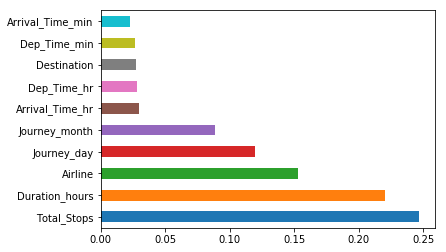

In [30]:
features = pd.Series( feat.feature_importances_ , index = x_train.columns )
features.nlargest(10).plot(kind = "barh")
plt.show()

In [31]:
##create model
lr = LinearRegression()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [32]:
print(lr.fit(x_train , y_train))
print(xgb.fit(x_train , y_train))
print(rfr.fit(x_train , y_train))
print(dt.fit(x_train , y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [33]:
#train acc

print(r2_score(lr.predict(x_train) , y_train))
print(r2_score(xgb.predict(x_train) , y_train))
print(r2_score(rfr.predict(x_train) , y_train))
print(r2_score(dt.predict(x_train) , y_train))


-0.11688560203520115
0.9286161967213169
0.9392648736506254
0.9703741070907215


In [34]:
#train acc

print(r2_score(lr.predict(x_test) , y_test))
print(r2_score(xgb.predict(x_test) , y_test))
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))


-0.1357759899794111
0.7735574129485412
0.7401017532124883
0.6678409358553359


C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


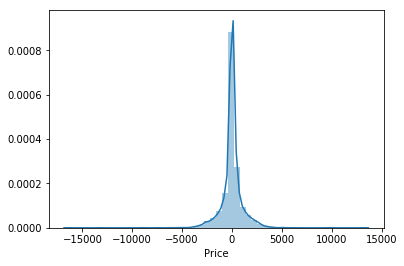

In [35]:
#check distribution
sb.distplot(rfr.predict(x_train) - y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


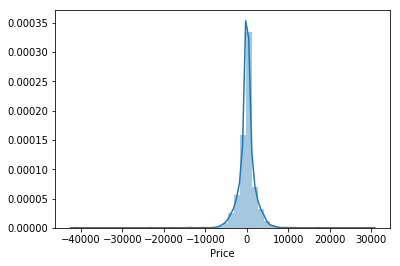

In [36]:
#check  distribution
sb.distplot(rfr.predict(x_test) - y_test)

In [95]:
##hyperparameter tuning


##hyper params tuning


rf_p = {
    
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200)),
    "n_estimators": list(range(1,500))
}

dt_p = {
    "criterion":["mse"],
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200))
}

xgb_p = {
    "learning_rate" : [0.1,0.2,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.5],
    "max_depth" : list(range(1,200)),
    "booster" : ['gbtree', 'gblinear' ,'dart'],
    "min_child_weight" : list(range(1,20)),
    "n_estimators" : list(range(1,200))
}

In [96]:
rscv = RandomizedSearchCV(rfr , param_distributions=rf_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [97]:
rscv.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.0min remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=138,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=263,
                                                   n_jobs=None, oob_score=False,
                                                   random_state...


In [98]:
rscv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, n_estimators=69,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
rfr =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, n_estimators=69,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [101]:
rfr.fit(x_train , y_train)
xgb.fit(x_train , y_train)
dt.fit(x_train , y_train)

[18:48:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


DecisionTreeRegressor(criterion='mse', max_depth=143, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [102]:
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(xgb.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))



0.7829117453069938
0.7799125426915801
0.7581341453806527


In [90]:
df1

,Airline,Source,Destination,Total_Stops,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,0,2,1,1,6,6,17,30,4,25,10,55
1,1,3,0,1,12,5,6,20,10,20,4,0
2,0,2,1,1,5,21,19,15,19,0,23,45
3,3,2,1,1,5,21,8,0,21,0,13,0
4,6,0,2,0,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2,3,0,1,6,6,20,30,20,25,23,55
2667,1,3,0,0,3,27,14,20,16,55,2,35
2668,0,2,1,1,6,3,21,50,4,25,6,35
2669,2,2,1,1,6,3,4,0,19,15,15,15


In [103]:
#save the model

file = open(r'main_flight_rfr.pkl', "wb")
pickle.dump(rfr , file)



In [104]:
model = open(r'main_flight_rfr.pkl', "rb")
forest = pickle.load(model)

In [105]:
#testing pickle file
z = forest.predict(df1.iloc[1:2 , :])

In [106]:
for j in z:
    print(j)

4297.904468599034
